<a href="https://colab.research.google.com/github/mukund-rajukumar/My-VisionAI-Projects/blob/main/FnB_CPG_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optimizing Vending Machine Inventory with AI: A Deep Dive into Model Selection

### Introduction:
Vending machines, once simple dispensers, are evolving into data-driven hubs. To maximize customer satisfaction and revenue, owners need real-time insights into product consumption. This article explores how Vision AI can enhance inventory management by using cameras to monitor purchases.

### The Challenge:
Traditional inventory methods often rely on manual checks or unreliable sensors. Vision AI offers a more accurate and efficient solution. However, the diversity of products in vending machines, coupled with varying package sizes and shapes, presents a unique challenge.

### The Solution: Deep Learning
Deep learning, a subset of AI, is ideally suited for this task. It can learn complex patterns from vast datasets, making it capable of identifying and classifying products even in the face of variations.

### Beyond the model: The Vision AI stack
While the AI model is crucial, it is part of the larger vision AI solution stack. Key components include:
1. Hardware Selection: Choosing the right camera with desired FoV that can capture high quality images in various lighting conditions
2. Hardware Installation: Ensuring cameras are securely mounted and positioned to capture optimal product views without being intrusive or compromising customer experience.
3. Data Transmission: Selecting reliable communication mechanism to transmit image/video data to the processing system
4. Processing System: Determining whether to run the AI model on-device (edge computing) or in the cloud or in a hybrid fashion.
5. Data Storage: Saving necessary data to support future analysis and reporting
6. Data Presentation: Helping owners visualize the insights via a front-end application

### Model Development: A Deep Dive

To accurately track product purchases, we need a reference database containing images and corresponding information for each product in the vending machine, including product name and location within the machine. Our motion-detection camera captures footage whenever a customer makes a purchase. By analyzing the movement of the product from its slot, we can effectively identify the specific item purchased.

Our AI models must perform the following tasks:
1. Object Detection: Identify and locate individual products within a vending machine image by placing bounding boxes around them.
2. Optical Character Recognition (OCR): Extract text from the cropped images within each bounding box to determine the product name. These names will serve as the classes or product types carried by the vending machine.
3. Object Classification (Optional): Given an image of a product, accurately categorize it into one of the predefined classes based on its visual features. Alternatively, we can use the images captured before and after a purchase to identify the slot/bounding box from which the product was taken. This information can then be mapped back to the product name using the reference database.

An AI model development involved the following 6 steps:
1. Data Collection: Gather a diverse dataset of images depicting various products in vending machines. Ensure the dataset covers different lighting conditions, angles, and product placements.
2. Data Preprocessing: Clean and prepare the data for training. This may involve resizing images, normalizing pixel values, and augmenting the dataset to introduce variations.
3. Model Architecture Selection: Choose a suitable deep learning architecture, such as a convolutional neural network (CNN), which excels at image recognition tasks.
4. Training: Train the model on the prepared dataset. This involves feeding the model images and their corresponding labels, allowing it to learn the underlying patterns.
5. Validation: Evaluate the model's performance on a separate validation dataset to assess its generalization ability.
6. Inference: Deploy the trained model to analyze real-time camera feeds and predict the products being purchased.

We will look into each one of these 6 steps in detail for both Object Detection model and the OCR model, starting with Object Detection model first.

## Object Detection Model
In order to determine whether I can use an existing pre-trained AI model as-is for my application or will I have to train or fine-tune a model, I had to evaluate whether any of the pre-trained models will work or not. So, I shortlisted top object detection models:
Many object detectors use 2 stages, first generate object proposals to identify regions of interest in an image and then these regions are passed on to a detection network to classify them.
One stage methods prioritize inference speed over detection accuracy

Single stage detectors
1. YOLO (You only look once)
2. SSD (Single Shot Detector)
2-stage detectors
3. Detectron
4. Faster R-CNN  

### Step 1: Data Collection
We need

In [ ]:
#!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("openfoodfacts/nutriscore-object-detection")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/502 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/82 [00:00<?, ? examples/s]

In [ ]:
#dst = ds['train'].map(lambda example: {'brand': 'None', 'desc': 'None'})

dsv = ds['val'].map(lambda example: {'desc': 'None'})

Map:   0%|          | 0/82 [00:00<?, ? examples/s]

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# def create_bounding_box(image, bbox, color='red', linewidth=2):
#     """
#     Creates a bounding box on an image using normalized coordinates.

#     Args:
#         image: A NumPy array representing the image.
#         bbox: A list or tuple of four normalized coordinates (x1, y1, x2, y2).
#         color: The color of the bounding box (default: 'red').
#         linewidth: The width of the bounding box (default: 2).

#     Returns:
#         The created axes object.
#     """

#     width, height = image.size

#     # Create a figure and axes
#     fig, ax = plt.subplots()

#     # Display the image
#     ax.imshow(image)

#     if (bbox != 'None'):
#       y1, x1, y2, x2 = bbox
#       # Convert normalized coordinates to pixel coordinates
#       x1 = int(x1 * width)
#       y1 = int(y1 * height)
#       x2 = int(x2 * width)
#       y2 = int(y2 * height)
#       # Create a rectangle patch
#       rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=linewidth, edgecolor=color, facecolor='none')
#       # Create a rectangle patch
#       rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=linewidth, edgecolor=color, facecolor='none')
#       # Add the rectangle to the axes
#       ax.add_patch(rect)

#     ax.axis('off')
#     return ax

In [ ]:
# import time
# def make_api_call(prompt, image):
#   """Calls a Large Language Model (LLM) API to generate text based on a prompt and image.

#   Args:
#       prompt (str): The text prompt for the LLM.
#       image (Image.Image): The image to be analyzed by the LLM.

#   Returns:
#       genai.TextGenerationResponse: The response object from the LLM API.
#   """
#   try:
#     response = model.generate_content([prompt, image])
#     return response
#   except Exception as e:
#     if e.code == 429:
#       print ("Rate Limit Error")
#       # Implement retry logic or handle the error appropriately
#       return handle_rate_limit_error(prompt, image)

#     # Handle other exceptions or return None if no response is available
#     print(f"An error occurred: {e}")
#     return None

# def handle_rate_limit_error(prompt, image):
#   """Handles rate limit errors from the LLM API by implementing a retry logic.

#   Args:
#       prompt (str): The text prompt for the LLM.
#       image (Image.Image): The image to be analyzed by the LLM.

#   Returns:
#       genai.TextGenerationResponse: The response object from the LLM API after retrying.
#   """
#   time.sleep(60)
#   return model.generate_content([prompt, image])

In [ ]:
# Plot bounding box that comes with the dataset onto the images
# train_ds = ds['train']
# val_ds = ds['val']
# ds_sample = train_ds[7]
# image = ds_sample['image']

# if (len(ds_sample['objects']['bbox']) != 0):
#   bbox = ds_sample['objects']['bbox'][0]  # Assuming there is only one object
# else:
#   bbox = 'None'
#   print('Bounding Box empty')

# ax = create_bounding_box(image, bbox)
# plt.show()

In [ ]:
# # Setup genAI model to generate label for images
# import google.generativeai as genai
# import os
# from google.colab import userdata

# genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))
# # This is probably a 32B param model
# model = genai.GenerativeModel('gemini-1.5-flash')
# resized_width = 200
# img_desc_prompt = "Write a 3-word phrase summary for the image content and identify the brand of the package. Show them side-by-side with '|' separator"


# Token finder
## For Gemini, a token = ~4 characters
* Images are considered to be a fixed size, so they consume a fixed number of tokens (currently 258 tokens), regardless of their display or file size.

* Video and audio files are converted to tokens at the following fixed rates: video at 263 tokens per second and audio at 32 tokens per second.
https://ai.google.dev/gemini-api/docs/tokens?lang=python

In [ ]:
# from PIL import Image
# image = dst[0]['image']
# response = model.count_tokens(img_desc_prompt)
# print(f"Text-only prompt: {response}")
# response1 = model.count_tokens(image)
# print(f"Image-only prompt: {response1}")
# response = model.count_tokens([img_desc_prompt, image])
# print(f"Prompt Token Count: {response.total_tokens}")
# #print(f"Prompt Character Count: {response.total_billable_characters}")
# width, height = image.size
# aspect_ratio = width/height
# resized_img = image.resize((resized_width,int(resized_width/aspect_ratio)),Image.Resampling.LANCZOS)
# llm_response = make_api_call(img_desc_prompt, resized_img)
# usage_metadata = llm_response.usage_metadata
# print(f"Prompt Token Count: {usage_metadata.prompt_token_count}")
# print(f"Candidates Token Count: {usage_metadata.candidates_token_count}")
# print(f"Total Token Count: {usage_metadata.total_token_count}")

In [ ]:
# pkg_info_val = []

In [ ]:
# # Call LLM to get label for images
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# from PIL import Image

# for i in tqdm(range(52,82)):
# #for i in tqdm(range(len(dsv))):
#   image = dsv[i]['image']
#   width, height = image.size
#   aspect_ratio = width/height
#   resized_img = image.resize((resized_width,int(resized_width/aspect_ratio)),Image.Resampling.LANCZOS)
#   llm_response = make_api_call(img_desc_prompt, resized_img)
#   #print(llm_response.text)
#   try:
#     text_content = getattr(llm_response, "text")
#     parts = text_content.split('|')
#     # Extract the first and second parts
#     desc = parts[0].strip()
#     brand = parts[1].strip()
#     #dsv[i].update({'brand': brand, 'desc': desc})
#     pkg_info_val.append({'image_id': dsv[i]['image_id'], 'brand': brand, 'desc': desc})
#     print(f"Brand:{brand}, Desc:{desc}")
#   except:
#     print("The 'text' field does not exist.")
# #
# # plt.imshow(resized_img)
# # plt.axis('off')
# # plt.show()

In [ ]:
# # Write Dict List with pkg brand info to csv file
# import csv

# with open("pkg_info_val.csv", "w", newline="") as csvfile:
#     fieldnames = pkg_info_val[0].keys()
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     # Write the header row
#     writer.writeheader()

#     # Write the data rows
#     for row in pkg_info_val:
#         writer.writerow(row)

In [ ]:
# Read pkg brand info from csv file and load to a dict list
import csv

pkg_info_val = []
with open("pkg_info_val.csv", "r") as f:
  reader = csv.DictReader(f)
  # Get the header row as keys
  keys = reader.fieldnames
  for row in reader:
    row_dict = dict(zip(keys, row.values()))
    pkg_info_val.append(row_dict)

In [ ]:
# import matplotlib.pyplot as plt
# image = dsv[0]['image']
# plt.imshow(image)
# plt.axis('off')
# plt.show()

In [ ]:
# Define a function to update the "new_feature" key
def add_new_feature(example, index):
    example['desc'] = f"{pkg_info_val[index]['brand']} | {pkg_info_val[index]['desc']}"
    #example['desc'] = pkg_info_val[index]['desc']
    return example

# Apply the function to the dataset
dsv = dsv.map(add_new_feature, with_indices=True)

Map:   0%|          | 0/82 [00:00<?, ? examples/s]

In [ ]:
from datasets import Dataset, Features, Value
from PIL import Image

# Specify the length you want for your dataset
num_rows = len(dsv)

# Create a dictionary with placeholder data (None, empty strings, etc.) of the required length
data = {
  'image':[dsv[1]['image']] * num_rows,
  'desc': [None] * num_rows,
}

# Create the dataset from this dictionary
train_dataset = Dataset.from_dict(data)

# Define a function to update the "new_feature" key
def add_new_feature2(example, index):
    image = dsv[index]['image']
    resized_width = 200
    width, height = image.size
    aspect_ratio = width/height
    resized_img = image.resize((resized_width,int(resized_width/aspect_ratio)),Image.Resampling.LANCZOS)
    example['image'] = resized_img
    example['desc'] = dsv[index]['desc']
    return example

# Apply the function to the dataset
train_dataset = train_dataset.map(add_new_feature2, with_indices=True)

Map:   0%|          | 0/82 [00:00<?, ? examples/s]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import pickle

# # Specify the file path in your Google Drive
# file_path = '/content/drive/My Drive/ds_train.pkl'

# # Save the variable using pickle
# with open(file_path, 'wb') as f:
#   pickle.dump(ds_train, f)

# Next Steps
1. Pick a model to describe package image
2. Fine-tune the model with my data
3. Perform detection on new images
4. Evaluate performance: AP, F1
5. Profile GPU vs CPU load
6. Identify a tinyML model to run on hardware
7. Select appropriate hardware
8. Check inference output and performance

### Step 1. Model to describe image
MS GenerativeImage2Text(GIT) model is expert at giving detailed description of images. **GIT has 176M params**<br>

In comparison, OpenCLIP is a more versatile model that can do broader tasks such as image classification, search etc. OpenCLIP is a family of models with ViT-L/14, one of their larger moodels based on ViT architecture, containing **~330M params**

In [ ]:
#1 Pick a model
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from PIL import Image

checkpoint = "microsoft/git-base" #"microsoft/git-base-coco"
processor = AutoProcessor.from_pretrained(checkpoint)
model = AutoModelForCausalLM.from_pretrained(checkpoint)

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
# image = train_dataset[10]['image']
# pixel_values = processor(images=image, return_tensors="pt").pixel_values

# generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
# generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
# print(generated_caption)

In [ ]:
# plt.imshow(image)
# plt.axis('off')
# plt.show()

In [ ]:
from torch.utils.data import Dataset

class ImageDescriptionDataset(Dataset):
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]

    encoding = self.processor(images=item["image"], text=item["desc"], padding="max_length", return_tensors="pt")

    # remove batch dimension
    encoding = {k:v.squeeze() for k,v in encoding.items()}

    return encoding

In [ ]:
train_ds = ImageDescriptionDataset(train_dataset, processor)

In [ ]:
item = train_ds[0]
for k,v in item.items():
  print(k,v.shape)

input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_ds, shuffle=True, batch_size=4)

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

input_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
pixel_values torch.Size([4, 3, 224, 224])


In [ ]:
# # Count and print the total number of params in a model
# checkpoint = "microsoft/git-base" #"microsoft/git-base-coco"
# model = AutoModelForCausalLM.from_pretrained(checkpoint)
# total_params = 0
# for param in model.parameters():
#   num_elements = 1
#   for dim in param.size():
#       num_elements *= dim
#   total_params += num_elements
# print(f"Model {model.name_or_path}: {total_params / 1000000:.1f} million parameters")

In [ ]:
# Model Training
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(10):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)
    attention_masks = batch.pop("attention_mask").to(device)

    outputs = model(input_ids=input_ids,
                    attention_mask=attention_masks,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

Epoch: 0
Loss: 12.078919410705566
Loss: 10.507966041564941
Loss: 10.099727630615234
Loss: 9.76761531829834
Loss: 9.499608039855957
Loss: 9.255867004394531
Loss: 9.054056167602539
Loss: 8.874899864196777
Loss: 8.73300838470459
Loss: 8.603819847106934
Loss: 8.484983444213867
Loss: 8.368755340576172
Loss: 8.261280059814453
Loss: 8.148987770080566
Loss: 8.056500434875488
Loss: 7.9766340255737305
Loss: 7.848114013671875
Loss: 7.748885631561279
Loss: 7.633164882659912
Loss: 7.527057647705078
Loss: 7.441709995269775
Epoch: 1
Loss: 7.31903600692749
Loss: 7.204935073852539
Loss: 7.124861717224121
Loss: 6.998996257781982
Loss: 6.900627136230469
Loss: 6.79157018661499
Loss: 6.6915998458862305
Loss: 6.577901363372803
Loss: 6.457350254058838
Loss: 6.340201377868652
Loss: 6.225438117980957
Loss: 6.113254070281982
Loss: 6.014712810516357
Loss: 5.8926920890808105
Loss: 5.792050361633301
Loss: 5.660085678100586
Loss: 5.547205924987793
Loss: 5.450284004211426
Loss: 5.323269844055176
Loss: 5.213534832000

KeyboardInterrupt: 

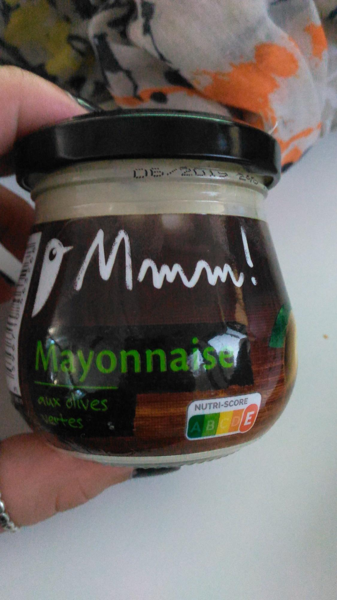

In [ ]:
# Inference
dst = ds['train']
example = dst[3]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [ ]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

auchan | smoked salmon
